In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import geopandas as gpd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
bigp = ['AL', 'BNP', 'Jamaat', 'JaPa']
mainp = ['AL', 'BNP']
years = [1991, 1996, 2001, 2008]

In [3]:
dfs = pd.read_csv('data/seat_summary.csv')
dfs.head()

,seat,year,turnout,turnout_pc,voters
0,Panchagarh-1,2024,192579.0,44.08,436923.0
1,Panchagarh-1,2018,320597.0,84.54,379207.0
2,Panchagarh-1,2014,86046.0,26.16,328959.0
3,Panchagarh-1,2008,266812.0,91.70,291095.0
4,Panchagarh-1,2001,206827.0,86.15,240073.0


In [4]:
dfs.shape

(1279, 5)

In [5]:
# only take 1991-2008 election data
dfs = dfs[dfs.year.isin(years)]
dfs.shape

(1101, 5)

In [6]:
bdmap = gpd.read_file('map/seats.shp')
bdmap.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494..."
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971..."
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788..."
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,..."
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391..."


In [7]:
# find median turnout % of each seat
tpc_med = dfs.groupby('seat').median()['turnout_pc']

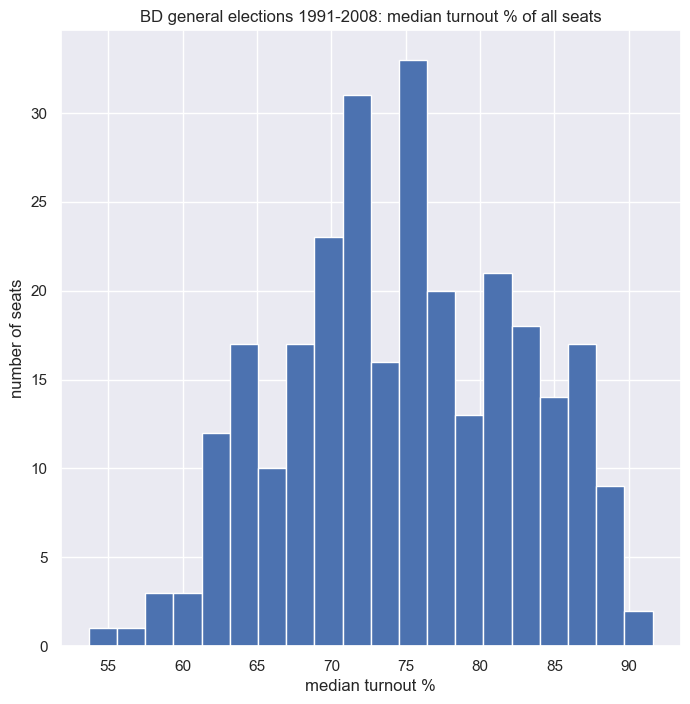

In [8]:
# plot histogram
fig, ax = plt.subplots(figsize=(8, 8))
tpc_med.hist(bins=20, ax=ax)
ax.set_title('BD general elections 1991-2008: median turnout % of all seats')
ax.set_xlabel('median turnout %')
ax.set_ylabel('number of seats')
fig.savefig('fig/turnout_pc_med',bbox_inches='tight')

In [9]:
# join data with map data
map_tpc = pd.merge(bdmap, tpc_med, how='left', left_on='seat', right_index=True)[['seat', 'geometry', 'turnout_pc']]
map_tpc.head()

,seat,geometry,turnout_pc
0,Panchagarh-1,"POLYGON ((88.72746 26.34527, 88.72772 26.34494...",83.98
1,Panchagarh-2,"POLYGON ((88.76158 26.30059, 88.76176 26.29971...",80.90
2,Thakurgaon-1,"POLYGON ((88.55589 26.17948, 88.55684 26.17788...",83.00
3,Thakurgaon-2,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,...",81.60
4,Thakurgaon-3,"POLYGON ((88.25475 26.03583, 88.25828 26.03391...",82.40


In [10]:
map_tpc[['seat', 'turnout_pc']].rename(columns={
    'turnout_pc': 'turnout_pc_med'
}).to_csv('dataout/turnout_pc_med.csv', index=False)

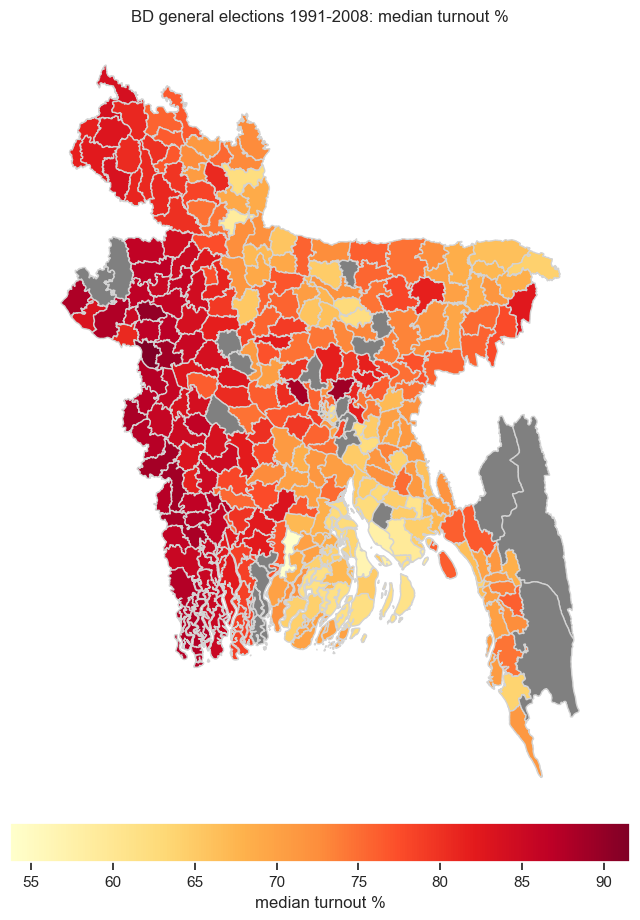

In [11]:
# plot map
fig, ax = plt.subplots(figsize=(8, 14))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

map_tpc.plot(
    column='turnout_pc', 
    cmap='YlOrRd', 
    edgecolor='lightgrey',
    legend=True, 
    ax=ax,
    cax=cax,
    missing_kwds={
        "color": "grey",
        "label": "missing data",
    }, 
    legend_kwds={
    'label': 'median turnout %',
    'orientation': 'horizontal'
    },
)
ax.set_axis_off()
ax.title.set_text("BD general elections 1991-2008: median turnout %")
fig.savefig('fig/turnout_pc_med',bbox_inches='tight')

In [12]:
# find stdev of turnout % of each seat
tpc_var = dfs.groupby('seat').var()['turnout_pc']
tpc_std = tpc_var.pow(1./2)

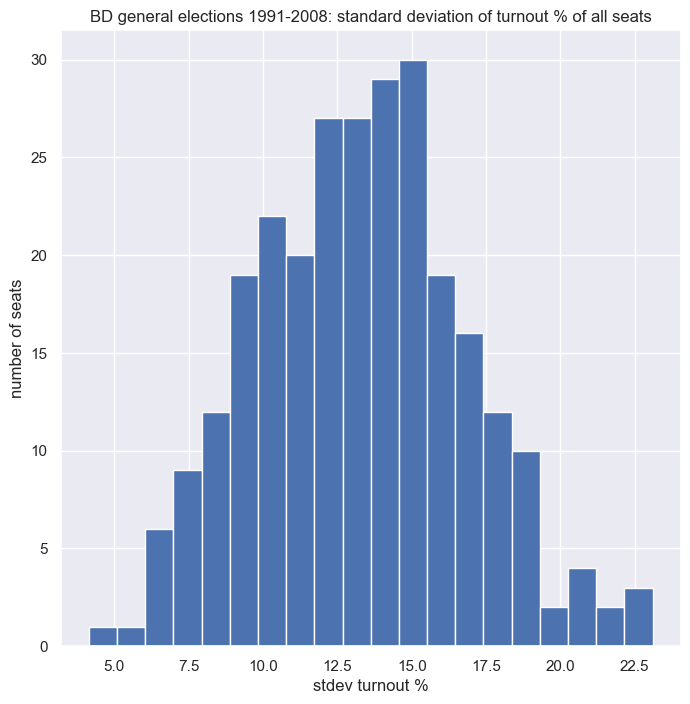

In [13]:
# plot histogram
fig, ax = plt.subplots(figsize=(8, 8))
tpc_std.hist(bins=20, ax=ax)
ax.set_title('BD general elections 1991-2008: standard deviation of turnout % of all seats')
ax.set_xlabel('stdev turnout %')
ax.set_ylabel('number of seats')
fig.savefig('fig/turnout_pc_std',bbox_inches='tight')

In [14]:
# join data with map data
map_tpc_std = pd.merge(bdmap, tpc_std, how='left', left_on='seat', right_index=True)[['seat', 'geometry', 'turnout_pc']]
map_tpc_std.head()

,seat,geometry,turnout_pc
0,Panchagarh-1,"POLYGON ((88.72746 26.34527, 88.72772 26.34494...",12.879237
1,Panchagarh-2,"POLYGON ((88.76158 26.30059, 88.76176 26.29971...",13.955883
2,Thakurgaon-1,"POLYGON ((88.55589 26.17948, 88.55684 26.17788...",10.361229
3,Thakurgaon-2,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,...",12.322743
4,Thakurgaon-3,"POLYGON ((88.25475 26.03583, 88.25828 26.03391...",10.094883


In [15]:
map_tpc_std[['seat', 'turnout_pc']].rename(columns={
    'turnout_pc': 'turnout_pc_std'
}).to_csv('dataout/turnout_pc_std.csv', index=False)

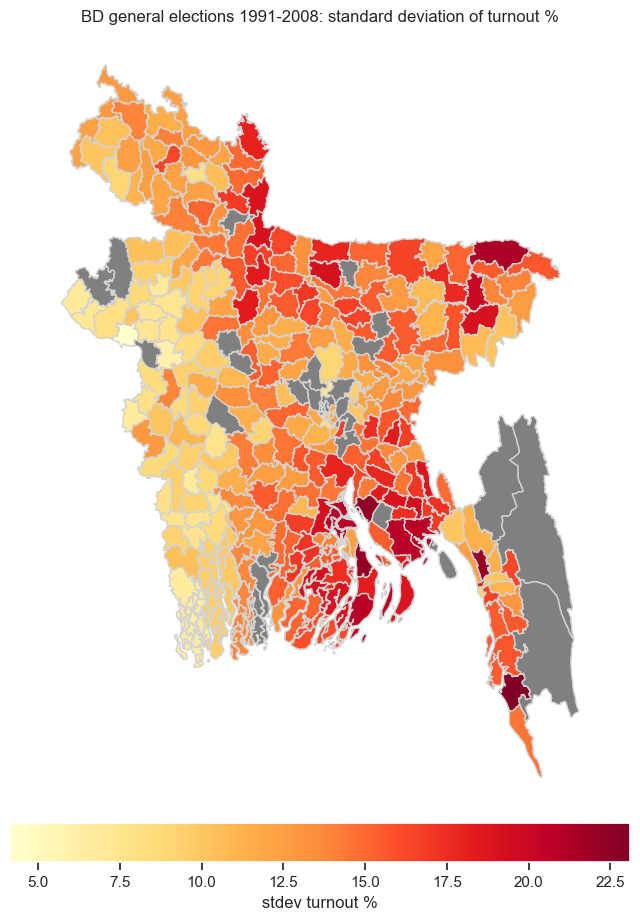

In [16]:
# plot map
fig, ax = plt.subplots(figsize=(8, 14))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

map_tpc_std.plot(
    column='turnout_pc', 
    cmap='YlOrRd', 
    edgecolor='lightgrey',
    legend=True, 
    ax=ax,
    cax=cax,
    missing_kwds={
        "color": "grey",
        "label": "missing data",
    }, 
    legend_kwds={
    'label': 'stdev turnout %',
    'orientation': 'horizontal'
    },
)
ax.set_axis_off()
ax.title.set_text("BD general elections 1991-2008: standard deviation of turnout %")
fig.savefig('fig/turnout_pc_std',bbox_inches='tight')